In [1]:
import time
from datetime import datetime
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 100)

In [2]:
df_report = pd.read_csv("data/report.csv", dtype={"6": str, "7": str})
df_report.rename(
    columns={
        "1": "row_id",
        "2": "year",
        "3": "month",
        "4": "field",
        "5": "id",
        "6": "father_id",
        "7": "mother_id",
        "8": "birthday",
        "9": "胎次",
        "10": "泌乳天數",
        "11": "volume",
        "12": "最近分娩日期",
        "13": "採樣日期",
        "14": "月齡",
        "15": "檢測日期",
        "16": "最後配種日期",
        "17": "最後配種精液",
        "18": "配種次數",
        "19": "前次分娩日期",
        "20": "第一次配種日期",
        "21": "第一次配種精液",
    },
    inplace=True
)
df_report.head()

,row_id,year,month,field,id,father_id,mother_id,birthday,胎次,泌乳天數,volume,最近分娩日期,採樣日期,月齡,檢測日期,最後配種日期,最後配種精液,配種次數,前次分娩日期,第一次配種日期,第一次配種精液
0,1,2013,3,A,52612,507H7173,96040545,2011/1/1 00:00,1,78.0,29.4,2013/1/1 00:00,2013/3/20 00:00,26,2013/3/21 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
1,2,2013,4,A,52612,507H7173,96040545,2011/1/1 00:00,1,107.0,27.8,2013/1/1 00:00,2013/4/18 00:00,27,2013/4/19 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
2,3,2013,5,A,52612,507H7173,96040545,2011/1/1 00:00,1,140.0,9.0,2013/1/1 00:00,2013/5/21 00:00,28,2013/5/22 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
3,4,2013,6,A,52612,507H7173,96040545,2011/1/1 00:00,1,175.0,13.0,2013/1/1 00:00,2013/6/25 00:00,29,2013/6/26 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
4,5,2013,7,A,52612,507H7173,96040545,2011/1/1 00:00,1,210.0,13.2,2013/1/1 00:00,2013/7/30 00:00,30,2013/7/31 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784


In [3]:
df_spec = pd.read_csv("data/spec.csv")
df_spec.rename(
    columns={
        "1": "id",
        "2": "狀況類別",
        "3": "狀況代號",
        "4": "狀況日期",
        "5": "備註",
        "6": "登錄日期",
        "7": "field",
    },
    inplace=True
)
df_spec["狀況日期"] = df_spec["狀況日期"].map(lambda s: datetime.strptime(s, "%Y/%m/%d %H:%M"))
df_spec["year"] = df_spec["狀況日期"].map(lambda s: s.year)
df_spec["month"] = df_spec["狀況日期"].map(lambda s: s.month)
df_spec["狀況代號"].fillna(value="", inplace=True)
df_spec["type"] = df_spec.apply(lambda r: "{}-{}".format(r["狀況類別"], r["狀況代號"]), axis=1)
df_spec.head()

,id,狀況類別,狀況代號,狀況日期,備註,登錄日期,field,year,month,type
0,5022341,N,,1999-08-24,NaN,NaN,A,1999,8,N-
1,5022362,N,,1999-08-24,NaN,NaN,A,1999,8,N-
2,5022365,N,,1999-08-24,NaN,NaN,A,1999,8,N-
3,5022372,N,,1999-08-24,NaN,NaN,A,1999,8,N-
4,5022373,N,,1999-08-24,NaN,NaN,A,1999,8,N-


In [4]:
df_birth = pd.read_csv("data/birth.csv")
df_birth.rename(
    columns={
        "1": "id",
        "2": "分娩日期",
        "3": "乾乳日期",
        "4": "犢牛編號1",
        "5": "犢牛編號2",
        "6": "母牛體重",
        "7": "登錄日期",
        "8": "計算胎次",
        "9": "胎次",
        "10": "分娩難易度",
        "11": "犢牛體型",
        "12": "犢牛性別",
        "13": "field",
    },
    inplace=True
)
df_birth["乾乳日期"] = df_birth["乾乳日期"].map(lambda s: None if pd.isnull(s) else datetime.strptime(s, "%Y/%m/%d %H:%M"))
df_birth["乾乳年"] = df_birth["乾乳日期"].map(lambda s: 2000 if pd.isnull(s) else s.year)
df_birth["乾乳月"] = df_birth["乾乳日期"].map(lambda s: 1 if pd.isnull(s) else s.month)
df_birth.head()

,id,分娩日期,乾乳日期,犢牛編號1,犢牛編號2,母牛體重,登錄日期,計算胎次,胎次,分娩難易度,犢牛體型,犢牛性別,field,乾乳年,乾乳月
0,87121677,2013/1/4 00:00,NaT,NaN,NaN,NaN,2013/1/25 00:00,True,2,1.0,NaN,NaN,B,2000,1
1,96126940,2013/1/2 00:00,NaT,NaN,NaN,522.0,2013/1/25 00:00,True,2,2.0,NaN,NaN,B,2000,1
2,95181708,2013/1/14 00:00,2014-01-03,2188113,NaN,670.0,2013/1/25 00:00,True,5,1.0,NaN,NaN,C,2014,1
3,97127665,2013/1/9 00:00,2014-03-12,NaN,NaN,NaN,2013/1/25 00:00,True,3,2.0,NaN,NaN,B,2014,3
4,97182634,2013/1/9 00:00,2014-03-25,NaN,NaN,630.0,2013/1/25 00:00,True,4,1.0,NaN,NaN,C,2014,3


In [5]:
df_breed = pd.read_csv("data/breed.csv")
df_breed.columns = ["id", "配種日期", "配種精液", "登錄日期", "孕檢", "配種方式", "精液種類", "酪農場代號"]
df_breed.head()

,id,配種日期,配種精液,登錄日期,孕檢,配種方式,精液種類,酪農場代號
0,11361,2005/9/2 00:00,1H5506,2005/9/28 00:00,0,NaN,NaN,A
1,11469,2000/1/17 00:00,72H896,2000/1/31 00:00,0,NaN,NaN,A
2,11930,2000/5/12 00:00,9H2164,2000/5/22 00:00,0,NaN,NaN,A
3,11930,2000/5/26 00:00,1H2993,2000/7/6 00:00,0,NaN,NaN,A
4,11930,2000/7/4 00:00,14H2403,1988/7/29 00:00,0,NaN,NaN,A


In [6]:
df_submit = pd.read_csv("data/submission.csv")
df_submit.head()

,ID,1
0,480,NaN
1,742,NaN
2,743,NaN
3,744,NaN
4,745,NaN


#### 測試集 == df_submit

In [7]:
all(df_report[df_report["volume"].isnull()]["row_id"].values == df_submit["ID"].values)

True

In [8]:
df_birth.isna().sum()

id          0
分娩日期        0
乾乳日期     1637
犢牛編號1    2907
犢牛編號2    3753
母牛體重     3051
登錄日期        0
計算胎次        0
胎次          0
分娩難易度     903
犢牛體型     3408
犢牛性別     2802
field       0
乾乳年         0
乾乳月         0
dtype: int64

#### 訓練集的乳牛數

In [9]:
len(set(df_report["id"]))

1991

#### 有體重的乳牛

In [10]:
len(set(df_birth[df_birth["母牛體重"].notnull()]["id"]))

316

In [11]:
# 沒有體重資料的乳牛
len(set(df_report["id"]) - set(df_birth[df_birth["母牛體重"].notnull()]["id"]))

1675

#### 測試集的乳牛id是否都有歷史資料

In [12]:
# 測試集乳牛數
len(set(df_report[df_report["volume"].isnull()]["id"]))

846

In [13]:
# 有資料的乳牛數
len(set(df_report[df_report["volume"].notnull()]["id"]))

1821

In [14]:
# 有多少乳牛沒有歷史資料
len(set(df_report[df_report["volume"].isnull()]["id"]) - set(df_report[df_report["volume"].notnull()]["id"]))

170

### 乳量分布

In [15]:
df_report[df_report["volume"].notnull()].groupby("month")["volume"].aggregate(
    ["min", "max", "mean", "median", "std", "count"]
)

,min,max,mean,median,std,count
month,,,,,,
1,0.0,58.4,24.634626,24.00,9.149530,2631
2,0.0,58.0,25.239202,24.70,9.264851,2783
3,0.0,60.5,25.094327,25.00,9.014914,2697
4,0.0,61.0,24.943239,24.60,9.002821,2958
5,0.0,53.7,24.382015,24.00,8.630496,2908
6,0.0,52.8,24.088705,24.00,8.537625,2796
7,0.0,56.0,23.086387,23.00,8.170185,2762
8,0.0,53.0,22.930072,22.65,8.211716,2780
9,0.0,54.0,22.883155,22.30,8.436557,2618


### 要用的欄位

In [16]:
df_report.isna().sum()

row_id           0
year             0
month            0
field            0
id               0
father_id      876
mother_id     3584
birthday         0
胎次               0
泌乳天數             1
volume        4263
最近分娩日期           1
採樣日期             0
月齡               0
檢測日期             0
最後配種日期        1536
最後配種精液        1536
配種次數             0
前次分娩日期       17420
第一次配種日期       1431
第一次配種精液       1431
dtype: int64

In [17]:
df_report.groupby("胎次").count()[["id"]]

,id
胎次,
0,1
1,17418
2,10923
3,5300
4,2190
5,962
6,427
7,184
8,87


In [18]:
df_report["volume"].describe([0.01, 0.02, 0.03, 0.04, 0.05, 0.5, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99])

count    33254.000000
mean        23.991659
std          8.742980
min          0.000000
1%           7.000000
2%           9.000000
3%          10.000000
4%          10.000000
5%          10.000000
50%         23.400000
75%         30.000000
95%         39.000000
96%         40.000000
97%         41.600000
98%         43.000000
99%         46.000000
max         61.000000
Name: volume, dtype: float64

In [19]:
df_report.dropna(subset=["最近分娩日期", "泌乳天數"], inplace=True)

In [20]:
df_report["father_id"].fillna(value="", inplace=True)
df_report["mother_id"].fillna(value="", inplace=True)

In [21]:
df_report = df_report[df_report["胎次"] <= 8]

In [22]:
df_report.reset_index(drop=True, inplace=True)

In [23]:
df_report["最近分娩日期"] = df_report["最近分娩日期"].map(lambda s: datetime.strptime(s, "%Y/%m/%d %H:%M"))
df_report["採樣日期"] = df_report["採樣日期"].map(lambda s: datetime.strptime(s, "%Y/%m/%d %H:%M"))
df_report["採樣_最近分娩"] = df_report.apply(lambda r: (r["採樣日期"] - r["最近分娩日期"]).days, axis=1)

In [24]:
def _(i):
    if i >= 1 and i <= 4:
        return "1~4"
    if i >= 5 and i <= 8:
        return "5~8"
    return "9~12"
df_report["month_3"] = df_report["month"].map(lambda i: _(i))

def _(i):
    if i in {1, 2, 3}:
        return "1~3"
    if i in {4, 5, 6}:
        return "4~6"
    if i in {7, 8, 9}:
        return "7~9"
    return "10~12"
df_report["month_4"] = df_report["month"].map(lambda i: _(i))

In [25]:
is_disease = []
is_no_milk = [] # 乾乳期
for _, row in df_report.iterrows():
    if df_spec[
        (df_spec["id"] == row["id"]) & (df_spec["year"] == row["year"]) & (df_spec["month"] == row["month"])
    ].shape[0] != 0:
        is_disease.append(1)
    else:
        is_disease.append(0)
    
    if df_birth[
        (df_birth["id"] == row["id"]) & (df_birth["乾乳年"] == row["year"]) & (df_birth["乾乳月"] == row["month"])
    ].shape[0] != 0:
        is_no_milk.append(1)
    else:
        is_no_milk.append(0)
df_report["is_disease"] = is_disease
df_report["is_no_milk"] = is_no_milk

In [26]:
df_report[df_report["volume"].notnull()].groupby("month")["volume"].aggregate(
    ["min", "max", "mean", "median", "std", "count"]
)

,min,max,mean,median,std,count
month,,,,,,
1,0.0,58.4,24.641134,24.0,9.150343,2628
2,0.0,58.0,25.242158,24.7,9.266167,2780
3,0.0,60.5,25.103973,25.0,9.013309,2693
4,0.0,61.0,24.949036,24.6,9.003132,2955
5,0.0,53.7,24.382691,24.0,8.632911,2906
6,0.0,52.8,24.091739,24.0,8.537784,2794
7,0.0,56.0,23.096665,23.0,8.168491,2759
8,0.0,53.0,22.939381,22.7,8.206633,2778
9,0.0,54.0,22.886549,22.3,8.436382,2617


#### spec 資訊

In [27]:
specs = list({s for s, i in dict(df_spec["type"].value_counts()).items() if i >=10})
len(specs)

35

In [28]:
id_to_spec_fea = {}
for _id, sub_df in df_spec.groupby("id"):
    f = np.zeros(len(specs))
    idx = [i for i, s in enumerate(specs) if s in set(sub_df["type"])]
    if len(idx):
        f[idx] = 1
    id_to_spec_fea[_id] = f.tolist()

In [29]:
data = []
for i in df_report["id"]:
    data.append(id_to_spec_fea.get(i, [0] * len(specs)))
df_disease = pd.DataFrame(data, columns=specs)

#### father_id, mother_id 次數

In [30]:
selected_father_id = {s for s, i in dict(df_report[df_report["volume"].notnull()]["father_id"].value_counts()).items() if i >= 10 and s != ""}
selected_mother_id = {s for s, i in dict(df_report[df_report["volume"].notnull()]["mother_id"].value_counts()).items() if i >= 10 and s != ""}
len(selected_father_id), len(selected_mother_id)

(282, 877)

In [31]:
data = []
for _, row in df_report.iterrows():
    f = row["father_id"] if row["father_id"] in selected_father_id else ""
    m = row["mother_id"] if row["mother_id"] in selected_mother_id else ""
    data.append([f, m])
df_father_mother = pd.DataFrame(data, columns=["selected_father", "selected_mother"])

In [32]:
df_report_final = pd.concat((df_report, df_disease, df_father_mother), axis=1)

In [33]:
df = df_report_final[
    [
        "row_id", "year", "month", "field", "id", "volume",
        "father_id", "mother_id",
        "胎次", "泌乳天數", "月齡",
        "最近分娩日期", "採樣日期", "配種次數",
        "month_3", "month_4",
        "採樣_最近分娩", "is_disease", "is_no_milk",
        "selected_father",
        "selected_mother"
    ] + specs
].copy()

### train / val / test

In [35]:
df_train = df[df["volume"].notnull()].copy()
df_test = df[df["volume"].isnull()].copy()

### 去掉volume離群值 ###
df_train = df_train[(df_train["volume"] >= 5) & (df_train["volume"] <= 46)].copy()

df_tr = df_train[df_train["year"] < 2018].copy()
df_val = df_train[df_train["year"] == 2018].copy()
df_tr.shape, df_val.shape, df_test.shape

((25752, 56), (7116, 56), (4263, 56))

#### feature

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost
import matplotlib.pyplot as plt

In [37]:
df_tr.head(1)

,row_id,year,month,field,id,volume,father_id,mother_id,胎次,泌乳天數,月齡,最近分娩日期,採樣日期,配種次數,month_3,month_4,採樣_最近分娩,is_disease,is_no_milk,selected_father,selected_mother,C-81,D-30,C-62,D-31,C-41,C-31,C-5,C-32,D-2,C-1,C-30,C-12,C-61,C-24,C-C,C-0,C-50,C-40,D-42,C-3,C-20,C-42,D-1,D-29,C-39,C-43,C-60,N-,D-20,C-11,C-27,C-53,D-21,C-45,C-2
0,1,2013,3,A,52612,29.4,507H7173,96040545,1,78.0,26,2013-01-01,2013-03-20,1,1~4,1~3,78,0,0,507H7173,96040545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
oe_month = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
month_fea = oe_month.fit_transform(df_tr["month"].values.reshape(-1, 1))

oe_field = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
field_fea = oe_field.fit_transform(df_tr["field"].values.reshape(-1, 1))

oe_id = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
id_fea = oe_id.fit_transform(df_tr["id"].values.reshape(-1 ,1))

oe_father = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
father_fea = oe_father.fit_transform(df_tr["selected_father"].values.reshape(-1, 1))

oe_mother = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
mother_fea = oe_mother.fit_transform(df_tr["selected_mother"].values.reshape(-1, 1))

oe_month_3 = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
month_3_fea = oe_month_3.fit_transform(df_tr["month_3"].values.reshape(-1, 1))

oe_month_4 = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
month_4_fea = oe_month_4.fit_transform(df_tr["month_4"].values.reshape(-1, 1))

features = [
    "胎次", 
    "泌乳天數", 
    "月齡", 
    "配種次數", 
    # "採樣_最近分娩",
    "is_disease",
    "is_no_milk",
]
features += specs

In [39]:
x_tr = np.concatenate((
    df_tr[features].values,
    month_fea,
    field_fea,
    id_fea,
    father_fea,
    # mother_fea,
    month_3_fea,
    # month_4_fea
    ), axis=1
)
y_tr = df_tr["volume"].values
x_tr.shape, y_tr.shape

((25752, 1838), (25752,))

In [40]:
month_fea = oe_month.transform(df_val["month"].values.reshape(-1, 1))
field_fea = oe_field.transform(df_val["field"].values.reshape(-1, 1))
id_fea = oe_id.transform(df_val["id"].values.reshape(-1 ,1))
father_fea = oe_father.transform(df_val["selected_father"].values.reshape(-1, 1))
mother_fea = oe_mother.transform(df_val["selected_mother"].values.reshape(-1, 1))
month_3_fea = oe_month_3.transform(df_val["month_3"].values.reshape(-1, 1))
month_4_fea = oe_month_4.transform(df_val["month_4"].values.reshape(-1, 1))

In [41]:
x_val = np.concatenate((
    df_val[features].values,
    month_fea,
    field_fea,
    id_fea,
    father_fea,
    # mother_fea,
    month_3_fea,
    # month_4_fea
    ), axis=1
)
y_val = df_val["volume"].values
x_val.shape, y_val.shape

((7116, 1838), (7116,))

### model

In [44]:
def loss(y_true, y_pred, return_losses=False):
    l = [np.power(i - j, 2) for i, j in zip(y_true, y_pred)]
    if return_losses:
        return np.sqrt(np.mean(l)), l
    return np.sqrt(np.mean(l))

In [45]:
model = xgboost.XGBRegressor(
    max_depth=None, learning_rate=0.2, n_estimators=500, subsample=0.8, n_jobs=8,
    colsample_bytree=0.9, 
)

In [46]:
t1 = datetime.now()
model.fit(x_tr, y_tr)
print(datetime.now() - t1)

0:02:10.052377


In [47]:
prediction_all = model.predict(x_val)
l, l_all = loss(y_val, prediction_all, return_losses=True)
print(f"validate loss: {l}")
df_val["pred"] = prediction_all
df_val["loss"] = l_all

validate loss: 5.575397866973536


```
feature:
month_fea, field_fea, id_fea, father_fea, mother_fea, month_3_fea, month_4_fea,
胎次, 泌乳天數, 月齡, 配種次數, 採樣_最近分娩, is_disease, `specs`
hyper:
max_depth=None, learning_rate=0.2, n_estimators=500, subsample=0.8, n_jobs=8, colsample_bytree=0.9
```
1. 全用 => 5.569513909276122
2. 去掉 id_fea => 5.7
3. 去掉 father_fea => 5.614918057221602
4. 去掉 mother_fea => 5.567117544546619
5. 去掉 mother_fea, 採樣_最近分娩 => 5.546539576478557
6. 去掉 mother_fea, 採樣_最近分娩, specs => 5.571134430503368
7. 去掉 mother_fea, 採樣_最近分娩, is_disease => 5.607048854513983
8. 去掉 mother_fea, 採樣_最近分娩, 胎次 => 5.586450300536761
9. 去掉 mother_fea, 採樣_最近分娩, month_4_fea => 5.543575874811644
10. 去掉 mother_fea, 採樣_最近分娩, month_4_fea，增加 is_no_milk當月 => 5.521250260030221
11. 去掉 mother_fea, 採樣_最近分娩, month_4_fea，增加 is_no_milk當月或前月 => 5.537155244281038

```
feature:
month_fea, field_fea, id_fea, father_fea, month_3_fea, 胎次, 泌乳天數, 月齡, 配種次數, is_disease, `specs`
hyper:
max_depth=None, learning_rate=0.2, n_estimators=500, subsample=0.8, n_jobs=8, colsample_bytree=0.9
```
1. volume 挑2%~98%來訓練 ( 9 ~ 43 ) => 5.3860216137340045
2. volume 挑3%~97%來訓練 ( 10 ~ 41 ) => 5.322555174478275
3. volume 挑5%~95%來訓練 ( 10 ~ 39 ) => 5.201807385246551

```
feature:
month_fea, field_fea, id_fea, selected_father, month_3_fea, 胎次, 泌乳天數, 月齡, 配種次數, is_disease, `specs`
hyper:
max_depth=None, learning_rate=0.2, n_estimators=500, subsample=0.8, n_jobs=8, colsample_bytree=0.9
```
1. volume 挑5%~95%來訓練 ( 10 ~ 39 ) => 5.18564322781415
2. volume 挑5%~95%來訓練 ( 10 ~ 39 )，增加selected_mother => 5.18683125292462

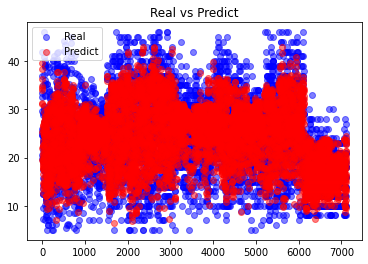

In [48]:
plt.scatter(np.arange(y_val.shape[0]), y_val, color='blue', label='Real', alpha=0.5)
plt.scatter(np.arange(y_val.shape[0]), prediction_all,  color='red' , label='Predict', alpha=0.5)
plt.title("Real vs Predict")
plt.legend(loc='best')
plt.show()

### hyperopt

In [ ]:
from hpsklearn import HyperoptEstimator
from hpsklearn import any_regressor
from hpsklearn import any_preprocessing
from hyperopt import tpe, hp, Trials
from hyperopt.fmin import fmin
from sklearn.metrics import mean_squared_error

In [ ]:
def objective2(params):
    est = int(params["n_estimators"])
    max_depth = params["max_depth"]
    sample = params["subsample"]
    
    model = xgboost.XGBRegressor(
        n_estimators=est, max_depth=max_depth, learning_rate=0.2, n_jobs=8, subsample=sample)
    model.fit(x_tr, y_tr)
    pred = model.predict(x_val)
    score = mean_squared_error(y_val, pred)
    return score

def optimize2(trial):
    params={
        "n_estimators":hp.choice("n_estimators", [300, 400, 500, 600]),
        "max_depth":hp.choice("max_depth", [5, 10, 15, 20, 25]),
        "subsample": hp.choice("subsample", [0.8, 0.85, 0.9, 0.95, 1.])
    }
    best2 = fmin(
        fn=objective2, space=params, algo=tpe.suggest, trials=trial, max_evals=200, rstate=np.random.default_rng(5)
    )
    return best2

In [ ]:
trial2 = Trials()
best2 = optimize2(trial2)

### submission

In [49]:
oe_month = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
month_fea = oe_month.fit_transform(df_train["month"].values.reshape(-1, 1))

oe_field = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
field_fea = oe_field.fit_transform(df_train["field"].values.reshape(-1, 1))

oe_id = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
id_fea = oe_id.fit_transform(df_train["id"].values.reshape(-1 ,1))

oe_father = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
father_fea = oe_father.fit_transform(df_train["selected_father"].values.reshape(-1, 1))

oe_mother = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
mother_fea = oe_mother.fit_transform(df_train["selected_mother"].values.reshape(-1, 1))

oe_month_3 = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
month_3_fea = oe_month_3.fit_transform(df_train["month_3"].values.reshape(-1, 1))

oe_month_4 = OneHotEncoder(sparse=False, categories="auto", handle_unknown="ignore")
month_4_fea = oe_month_4.fit_transform(df_train["month_4"].values.reshape(-1, 1))

features = [
    "胎次", 
    "泌乳天數", 
    "月齡", 
    "配種次數", 
    # "採樣_最近分娩",
    "is_disease",
    "is_no_milk",
]
features += specs

In [50]:
x_train = np.concatenate((
    df_train[features].values,
    month_fea,
    field_fea,
    id_fea,
    father_fea,
    # mother_fea,
    month_3_fea,
    # month_4_fea
    ), axis=1
)
y_train = df_train["volume"].values
x_train.shape, y_train.shape

((32868, 2159), (32868,))

In [51]:
month_fea = oe_month.transform(df_test["month"].values.reshape(-1, 1))
field_fea = oe_field.transform(df_test["field"].values.reshape(-1, 1))
id_fea = oe_id.transform(df_test["id"].values.reshape(-1 ,1))
father_fea = oe_father.transform(df_test["selected_father"].values.reshape(-1, 1))
mother_fea = oe_mother.transform(df_test["selected_mother"].values.reshape(-1, 1))
month_3_fea = oe_month_3.transform(df_test["month_3"].values.reshape(-1, 1))
month_4_fea = oe_month_4.transform(df_test["month_4"].values.reshape(-1, 1))

In [52]:
x_te = np.concatenate((
    df_test[features].values,
    month_fea,
    field_fea,
    id_fea,
    father_fea,
    # mother_fea,
    month_3_fea,
    # month_4_fea
    ), axis=1
)
x_te.shape

(4263, 2159)

In [53]:
model_final = xgboost.XGBRegressor(
    max_depth=None, learning_rate=0.2, n_estimators=500, subsample=0.8, n_jobs=8,
    colsample_bytree=0.9, 
)

In [54]:
model_final.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
prediction = model_final.predict(x_te)
df_test["1"] = prediction

In [56]:
a = df_test[["row_id", "1"]].rename(columns={"row_id": "ID"})

In [57]:
a

,ID,1
479,480,18.196312
741,742,30.073889
742,743,30.287807
743,744,29.961548
744,745,20.584095
...,...,...
37454,37481,17.257561
37455,37482,16.873838
37456,37483,17.569386
37457,37484,17.358900


In [58]:
a.to_csv("submission_res_0703_3.csv", index=None)

###

In [ ]:
prediction = model.predict(x_te)
df_test["1"] = prediction

In [ ]:
a = df_test[["row_id", "1"]].rename(columns={"row_id": "ID"})
# df_test[["row_id", "1"]].rename(columns={"row_id": "ID"}).to_csv("submission_res.csv", index=None)

In [ ]:
pd.merge(a, df_submit, on="ID", how="outer").shape

In [ ]:
len(df_submit)

In [ ]:
# a.to_csv("submission_res_0703.csv", index=None)

In [ ]:
prediction = model.predict(x_val)
l, l_all = loss(y_val, prediction, return_losses=True)
l